# Exercícios: Análise e Manipulação de Dados com DataFrames

Sugere-se que os exercícios a seguir sejam realizados com o auxílio do guia indicado na aula, disponível no endereço: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### Despesas Inativos Governo Federal

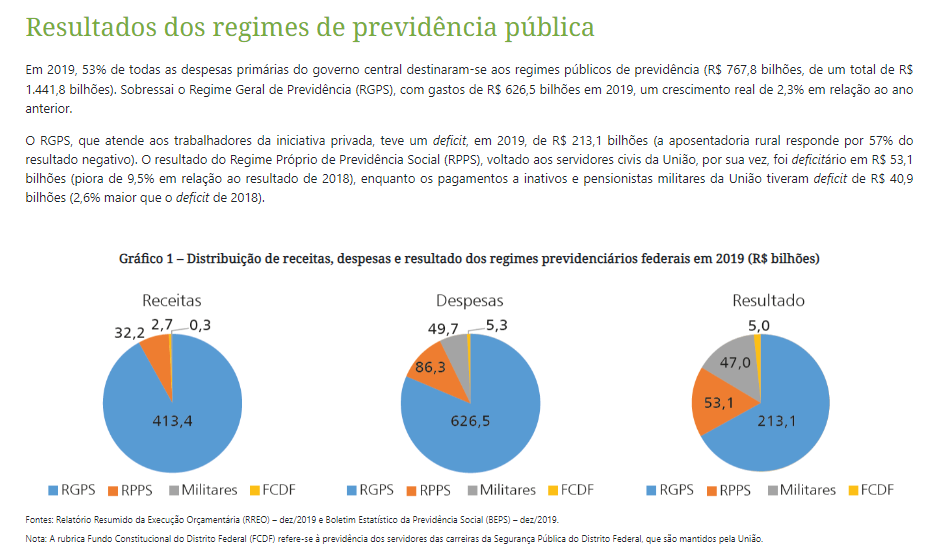

#### Carga da Base de Dados

Importe o módulo "json" e utilize o método json.load() para carregar a base de dados de despesas com inativos do período de 2015 a 2022.<br>
Se necessário, leia a documentação do módulo JSON em: https://docs.python.org/pt-br/3/library/json.html<br>
Após a carga, imprima o tamanho da base em quantidade de itens.<br>
Utilize o caminho definido abaixo:

In [1]:
arquivo = './data/despesas_inativos_2015-22.json'

In [2]:
import json

with open(arquivo, 'r') as arquivo_json:
    despesa_inativos = json.load(arquivo_json)

### Despesas Inativos Governo Federal - Pandas

#### Convertendo para DataFrame

Utilizando o módulo Pandas, converta a base de dados "despesa_inativos" para um DataFrame e exiba suas 5 primeiras linhas:

In [3]:
import pandas as pd
from pandas import DataFrame

df_inativos = DataFrame(despesa_inativos)
df_inativos.head()

,co_natureza_juridica,ds_natureza_juridica,co_organizacao_n0,ds_organizacao_n0,co_organizacao_n1,ds_organizacao_n1,co_organizacao_n2,ds_organizacao_n2,co_organizacao_n3,ds_organizacao_n3,an_lanc,me_lanc,va_custo_pessoal_inativo
0,-7,NAO DISPONIVEL,-7,NAO DISPONIVEL,-7,NAO DISPONIVEL,-7,NAO DISPONIVEL,-7,NAO DISPONIVEL,2015,1,1.706600e+09
1,3,ADMINISTRACAO DIRETA,000026,PRESIDENCIA DA REPUBLICA,002852,MINISTERIO DE MINAS E ENERGIA,-9,NAO SE APLICA,-9,NAO SE APLICA,2015,1,2.709981e+04
2,4,AUTARQUIA,000026,PRESIDENCIA DA REPUBLICA,000244,MINISTERIO DA EDUCACAO,000416,UNIVERSIDADE FEDERAL DO CEARA,-9,NAO SE APLICA,2015,1,8.528743e+06
3,3,ADMINISTRACAO DIRETA,000026,PRESIDENCIA DA REPUBLICA,001933,CONSELHO DE DEFESA NACIONAL,-9,NAO SE APLICA,-9,NAO SE APLICA,2015,1,1.324048e+04
4,3,ADMINISTRACAO DIRETA,000026,PRESIDENCIA DA REPUBLICA,000014,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",002797,"SUPERINTENDENCIA FEDERAL DE AGRICULTURA, PECUA...",-9,NAO SE APLICA,2015,1,3.786598e+06


#### Obtendo Informações Gerais Sobre o DataFrame

Antes de iniciar a análise dos dados, é importante obter informações básicas sobre seu tamanho, tipo de dados e conteúdo.<br>
Utilize os métodos adequados do DataFrame para exibir, sobre o df_inativos:
1. Número de linhas e colunas.
2. Nome das colunas.
3. Um resumo conciso das informações sobre as colunas, seus tipos de dados e contagem de valores.<br>
Se necessário, leia a documentação do DataFrame em: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [4]:
df_inativos.shape

(110812, 13)

In [5]:
df_inativos.columns

Index(['co_natureza_juridica', 'ds_natureza_juridica', 'co_organizacao_n0',
       'ds_organizacao_n0', 'co_organizacao_n1', 'ds_organizacao_n1',
       'co_organizacao_n2', 'ds_organizacao_n2', 'co_organizacao_n3',
       'ds_organizacao_n3', 'an_lanc', 'me_lanc', 'va_custo_pessoal_inativo'],
      dtype='object')

In [6]:
df_inativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110812 entries, 0 to 110811
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   co_natureza_juridica      110812 non-null  int64  
 1   ds_natureza_juridica      110812 non-null  object 
 2   co_organizacao_n0         110812 non-null  object 
 3   ds_organizacao_n0         71036 non-null   object 
 4   co_organizacao_n1         110812 non-null  object 
 5   ds_organizacao_n1         110812 non-null  object 
 6   co_organizacao_n2         110812 non-null  object 
 7   ds_organizacao_n2         110812 non-null  object 
 8   co_organizacao_n3         110812 non-null  object 
 9   ds_organizacao_n3         110812 non-null  object 
 10  an_lanc                   110812 non-null  int64  
 11  me_lanc                   110812 non-null  int64  
 12  va_custo_pessoal_inativo  110812 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory us

* Note que a base contém valores nulos na coluna 'ds_organizacao_n0'
* Isso é um indicativo de possível problema de qualidade dos dados!

Grande parte das colunas possui o tipo "object", que não são analisados, por padrão, pela função DataFrame.describe().<br>
Pesquise na documentação, disponível em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html, parâmetro necessário e utilize o método para descrever as colunas do tipo object presentes na base.

In [6]:
df_inativos.describe(include='object')

,ds_natureza_juridica,co_organizacao_n0,ds_organizacao_n0,co_organizacao_n1,ds_organizacao_n1,co_organizacao_n2,ds_organizacao_n2,co_organizacao_n3,ds_organizacao_n3
count,110812,110812,71036,110812,110812,110812,110812,110812,110812
unique,6,4,3,61,65,339,360,2199,2180
top,AUTARQUIA,000026,PRESIDENCIA DA REPUBLICA,000244,MINISTERIO DA EDUCACAO,000324,SECRETARIA-EXECUTIVA,-9,NAO SE APLICA
freq,48291,110095,70719,45661,45661,2817,5078,12952,12952


Por fim, selecione a coluna an_lanc e obtenha os valores distintos da série resultante para confirmar quais anos estão abrangidos pela base de dados.<br>
Dica: pesquise o termo "unique" na documentação de do Pandas Series: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html

In [8]:
df_inativos['an_lanc'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

#### Manipulando o DataFrame

Inicialmente, vamos renomear algumas das colunas do Dataframe para nomes mais amigáveis.<br>
Modifique o nome das colunas conforme a tabela a seguir:
|Nome Atual|Nome Final  |
|-------|-------|
|an_lanc|ano|
|me_lanc|mes|
|va_custo_pessoal_inativo|valor|

In [9]:
df_inativos = df_inativos.rename(columns={'an_lanc':'ano','me_lanc':'mes','va_custo_pessoal_inativo':'valor'})

In [8]:
df_inativos['ds_natureza_juridica'].unique()

array(['NAO DISPONIVEL', 'ADMINISTRACAO DIRETA', 'AUTARQUIA',
       'FUNDACAO PUBLICA', 'SOCIEDADE DE ECONOMIA MISTA',
       'ORGAO PUBLICO AUTONOMO FEDERAL'], dtype=object)

Supondo que as colunas com prefixo "co_" armazenam códigos numéricos unívocos para as descrições contidas nas colunas com prefixo "ds_", seu conteúdo seria redundante.<br>
Baseado nessa hipótese didática, remova do DataFrame todas as colunas cujo nome se inicia com o prefixo "co_".
Exiba as primeiras 5 linhas do DataFrame resultante.

In [10]:
remover_colunas = [ coluna for coluna in df_inativos.columns if coluna.startswith('co_')]
df_inativos = df_inativos.drop(columns=remover_colunas)
df_inativos.head()

,ds_natureza_juridica,ds_organizacao_n0,ds_organizacao_n1,ds_organizacao_n2,ds_organizacao_n3,ano,mes,valor
0,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2015,1,1.706600e+09
1,ADMINISTRACAO DIRETA,PRESIDENCIA DA REPUBLICA,MINISTERIO DE MINAS E ENERGIA,NAO SE APLICA,NAO SE APLICA,2015,1,2.709981e+04
2,AUTARQUIA,PRESIDENCIA DA REPUBLICA,MINISTERIO DA EDUCACAO,UNIVERSIDADE FEDERAL DO CEARA,NAO SE APLICA,2015,1,8.528743e+06
3,ADMINISTRACAO DIRETA,PRESIDENCIA DA REPUBLICA,CONSELHO DE DEFESA NACIONAL,NAO SE APLICA,NAO SE APLICA,2015,1,1.324048e+04
4,ADMINISTRACAO DIRETA,PRESIDENCIA DA REPUBLICA,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...","SUPERINTENDENCIA FEDERAL DE AGRICULTURA, PECUA...",NAO SE APLICA,2015,1,3.786598e+06


#### Analisando e Descrevendo Dados

Utilize a função describe() sobre a coluna "valor" e, considerando que a base trata de pagamentos para servidores inativos, verifique se há valores inesperados.

In [11]:
df_inativos.valor.describe()

count    1.108120e+05
mean     3.469956e+06
std      5.717326e+07
min     -3.828426e+04
25%      1.898906e+04
50%      8.120865e+04
75%      6.230819e+05
max      2.664050e+09
Name: valor, dtype: float64

Calcule a soma dos valores negativos presentes na coluna "valor" do DataFrame.

In [12]:
print(f'R${df_inativos[df_inativos.valor<0].valor.sum():,.2f}')

R$-81,502.53


Utilizando um loop, calcule e imprima a soma dos valores referentes a cada ano da base e sua razão em relação ao total do ano incial.<br>
Analise se os valores absolutos e relativos parecem plausíveis.

In [13]:
base = None
for ano in df_inativos['ano'].unique():
    valor = df_inativos[df_inativos['ano']==ano]['valor'].sum()
    if not base:
        base = valor
    razao = valor/base
    print(f'{ano} - R${valor:,.2f} - {razao:.2f}')

2015 - R$37,630,549,015.54 - 1.00
2016 - R$39,524,303,035.98 - 1.05
2017 - R$45,639,356,992.39 - 1.21
2018 - R$47,539,212,052.55 - 1.26
2019 - R$51,264,894,527.33 - 1.36
2020 - R$54,484,845,655.87 - 1.45
2021 - R$54,122,848,010.79 - 1.44
2022 - R$54,306,700,182.16 - 1.44


Foi verificado que parte considerável da base contém valores faltantes no campo "ds_organizacao_n0".<br>
Calcule a soma dos valores cuja coluna 'ds_organizacao_n0' está ausente e o quanto isso representa percentualmente em relação ao valor total pago.
Dica: utilize a função pd.isna() para filtrar valores faltantes.

In [14]:
valor_na = df_inativos[pd.isna(df_inativos.ds_organizacao_n0)]['valor'].sum()
total = df_inativos['valor'].sum()
print(f'R$ {valor:,.2f} = {100*valor_na/total:,.2f}%')

R$ 54,306,700,182.16 = 16.38%


Liste os valores distintos da coluna "ds_natureza_juridica".

In [15]:
df_inativos['ds_natureza_juridica'].unique()

array(['NAO DISPONIVEL', 'ADMINISTRACAO DIRETA', 'AUTARQUIA',
       'FUNDACAO PUBLICA', 'SOCIEDADE DE ECONOMIA MISTA',
       'ORGAO PUBLICO AUTONOMO FEDERAL'], dtype=object)

Note que na coluna há linhas que contém 'NAO DISPONIVEL' como valor. Liste as primeiras 5 linhas do DataFrame que possuem tal valor na coluna df_natureza_juridica.

In [16]:
df_inativos[df_inativos['ds_natureza_juridica']=='NAO DISPONIVEL'].head()

,ds_natureza_juridica,ds_organizacao_n0,ds_organizacao_n1,ds_organizacao_n2,ds_organizacao_n3,ano,mes,valor
0,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2015,1,1.706600e+09
898,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2015,2,1.698864e+09
1797,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2015,3,1.754292e+09
2697,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2015,4,1.760380e+09
3595,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2015,5,1.765971e+09


Para cada ano, imprima o percentual dos valores relacionados à natureza jurídica "NAO DISPONIVEL" em relação ao total.<br>
Avalie as consequências dos valores para a transparência pública e para os resultados das análises realizadas com base nessa base de dados.

In [39]:
for ano in df_inativos['ano'].unique():
    df_ano = df_inativos[df_inativos['ano']==ano]
    total = df_ano['valor'].sum()
    nao_disponivel = df_ano[df_ano['ds_natureza_juridica']=='NAO DISPONIVEL']['valor'].sum()
    percentual = 100*nao_disponivel/total
    print(f'{ano} - {percentual:,.2f}%')

2015 - 55.87%
2016 - 55.94%
2017 - 54.80%
2018 - 54.76%
2019 - 59.47%
2020 - 20.08%
2021 - 26.38%
2022 - 57.40%


Calcule e imprima a soma dos valores referentes a cada ano da base para a ds_organizacao_n2  "COMANDO DA MARINHA" e avalie se os números apresentados parecem plausíveis.

In [20]:
for ano in df_inativos['ano'].unique():
    df_ano = df_inativos[df_inativos['ano']==ano]
    marinha = df_ano[df_ano['ds_organizacao_n2']=='COMANDO DA MARINHA']['valor'].sum()
    print(f'{ano} - R${marinha:,.2f}')

2015 - R$449,893,984.24
2016 - R$457,589,449.32
2017 - R$505,428,525.90
2018 - R$35,651,780.24
2019 - R$34,983,238.77
2020 - R$584,834,352.79
2021 - R$581,562,536.91
2022 - R$555,696,490.81


#### Armazenando o DataFrame

Utilize o método pandas.DataFrame.to_json para armazenar o DataFrame df_inativos em um arquivo denominado "df_inativos.json"

In [ ]:
df_inativos.to_json('./data/df_inativos.json')